In [80]:
import pandas as pd
import numpy as np
from glob import glob
import pickle
from collections import Counter

In [81]:
session_20_lst = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20',
               '21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40']
script_20_lst = ['script01','script02','script03','script04','script05','script06']
sex_lst = ['F', 'M']


In [82]:
sid_20_lst = []
sid_20_dict = {}
anno_20_df = pd.DataFrame()
for session in session_20_lst:
    df = pd.read_csv(f'../KEMDy20/annotation/Sess{session}_eval.csv', skiprows=1)
    df.rename(columns={' .1':'Segment ID'}, inplace=True)
    anno_20_df = anno_20_df.append(df)
    sid_20_dict[session] = df['Segment ID']
    sid_20_lst.extend(list(df['Segment ID']))
    

anno_20_df.reset_index(drop=True, inplace=True)
sid_20_lst[:3]

/tmp/ipykernel_2138867/2261264006.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anno_20_df = anno_20_df.append(df)
/tmp/ipykernel_2138867/2261264006.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anno_20_df = anno_20_df.append(df)
/tmp/ipykernel_2138867/2261264006.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anno_20_df = anno_20_df.append(df)
/tmp/ipykernel_2138867/2261264006.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anno_20_df = anno_20_df.append(df)
/tmp/ipykernel_2138867/2261264006.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

['Sess01_script01_User002M_001',
 'Sess01_script01_User002M_002',
 'Sess01_script01_User002M_003']

In [83]:
anno_20_df

,,start,end,Segment ID,Emotion,Valence,Arousal,Emotion.1,Valence.1,Arousal.1,...,Arousal.7,Emotion.8,Valence.8,Arousal.8,Emotion.9,Valence.9,Arousal.9,Emotion.10,Valence.10,Arousal.10
0,1,3.578390,11.637391,Sess01_script01_User002M_001,neutral,3.4,2.9,neutral,3,3,...,3,neutral,4,3,neutral,3,3,neutral,3,3
1,2,11.637391,23.334393,Sess01_script01_User002M_002,neutral,3.1,2.9,neutral,3,3,...,3,neutral,4,3,neutral,3,3,neutral,3,3
2,3,23.334393,31.558392,Sess01_script01_User002M_003,neutral,3.1,3.0,neutral,3,3,...,3,neutral,4,3,neutral,3,3,neutral,3,3
3,4,31.558392,42.970390,Sess01_script01_User002M_004,neutral,3.7,3.1,neutral,4,3,...,3,neutral,4,4,neutral,3,3,neutral,4,3
4,5,42.777290,44.863290,Sess01_script01_User001F_001,neutral,3.8,2.8,happy,5,2,...,2,neutral,4,3,neutral,3,3,happy,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13457,494,289.449980,294.943000,Sess40_script06_User079F_043,neutral,3.0,3.5,neutral,3,4,...,4,neutral,3,4,neutral,3,4,neutral,3,4
13458,495,294.943000,297.598000,Sess40_script06_User079F_044,neutral,2.9,3.1,neutral,3,2,...,3,neutral,3,3,neutral,3,4,neutral,2,4
13459,496,297.598000,304.171000,Sess40_script06_User079F_045,neutral,2.6,3.6,neutral,2,3,...,4,neutral,2,4,fear,2,4,neutral,3,4
13460,497,304.171000,306.863000,Sess40_script06_User079F_046,neutral,2.7,3.3,disgust,2,3,...,4,neutral,2,3,neutral,2,4,surprise,3,4


In [84]:
sid_20_counter = Counter(sid_20_lst)
[k for k in sid_20_counter if sid_20_counter.get(k) > 1]

[]

In [85]:
emotion_20_eval_df = anno_20_df[['Emotion.1','Emotion.2','Emotion.3','Emotion.4','Emotion.5','Emotion.6','Emotion.7','Emotion.8','Emotion.9','Emotion.10']]
valence_20_eval_df = anno_20_df[['Valence.1','Valence.2','Valence.3','Valence.4','Valence.5','Valence.6','Valence.7','Valence.8','Valence.9','Valence.10']]
arousal_20_eval_df = anno_20_df[['Arousal.1','Arousal.2','Arousal.3','Arousal.4','Arousal.5','Arousal.6','Arousal.7','Arousal.8','Arousal.9','Arousal.10']]

In [86]:
from collections import Counter

annot_target = []
for i in range(len(emotion_20_eval_df)):
    score_table = {'neutral': 0, 'happy': 0, 'surprise':0, 'disgust': 0, 'angry': 0, 'sad':0, 'fear': 0}
    i_of_tsdata = Counter(emotion_20_eval_df.iloc[i])
    for emotion in i_of_tsdata.keys():
        score_table[emotion] += i_of_tsdata[emotion]
    annot_target.append(list(score_table.values()))
annot_target[:3]

[[10, 0, 0, 0, 0, 0, 0], [10, 0, 0, 0, 0, 0, 0], [10, 0, 0, 0, 0, 0, 0]]

In [87]:
val_target = []
for i in range(len(valence_20_eval_df)):
    score_table = {1: 0, 2: 0, 3:0, 4: 0, 5: 0}
    i_of_tsdata = Counter(valence_20_eval_df.iloc[i])
    for val in i_of_tsdata.keys():
        score_table[val] += i_of_tsdata[val]
    val_target.append(list(score_table.values()))
val_target[:3]

[[0, 0, 6, 4, 0], [0, 0, 9, 1, 0], [0, 0, 9, 1, 0]]

In [88]:
arou_target = []
for i in range(len(arousal_20_eval_df)):
    score_table = {1: 0, 2: 0, 3:0, 4: 0, 5: 0}
    i_of_tsdata = Counter(arousal_20_eval_df.iloc[i])
    for arou in i_of_tsdata.keys():
        score_table[arou] += i_of_tsdata[arou]
    arou_target.append(list(score_table.values()))
arou_target[:3]

[[0, 1, 9, 0, 0], [0, 1, 9, 0, 0], [0, 0, 10, 0, 0]]

In [89]:
import numpy as np
import pandas as pd

annot_target = pd.Series(annot_target)
val_target = pd.Series(val_target)
arou_target = pd.Series(arou_target)

In [95]:
annotation_20 = anno_20_df.drop(columns=list(anno_20_df.columns[:3]))
annotation_20 = annotation_20.drop(columns=list(anno_20_df.columns[7:]))
annotation_20['emotion_vector'] = annot_target
annotation_20['valence_vector'] = val_target
annotation_20['arousal_vector'] = arou_target

In [96]:
annotation_20

,Segment ID,Emotion,Valence,Arousal,emotion_vector,valence_vector,arousal_vector
0,Sess01_script01_User002M_001,neutral,3.4,2.9,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 6, 4, 0]","[0, 1, 9, 0, 0]"
1,Sess01_script01_User002M_002,neutral,3.1,2.9,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 9, 1, 0]","[0, 1, 9, 0, 0]"
2,Sess01_script01_User002M_003,neutral,3.1,3.0,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 9, 1, 0]","[0, 0, 10, 0, 0]"
3,Sess01_script01_User002M_004,neutral,3.7,3.1,"[9, 1, 0, 0, 0, 0, 0]","[0, 0, 3, 7, 0]","[0, 0, 9, 1, 0]"
4,Sess01_script01_User001F_001,neutral,3.8,2.8,"[6, 4, 0, 0, 0, 0, 0]","[0, 0, 3, 6, 1]","[0, 2, 8, 0, 0]"
...,...,...,...,...,...,...,...
13457,Sess40_script06_User079F_043,neutral,3.0,3.5,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 10, 0, 0]","[0, 0, 5, 5, 0]"
13458,Sess40_script06_User079F_044,neutral,2.9,3.1,"[10, 0, 0, 0, 0, 0, 0]","[0, 1, 9, 0, 0]","[0, 1, 7, 2, 0]"
13459,Sess40_script06_User079F_045,neutral,2.6,3.6,"[9, 0, 0, 0, 0, 0, 1]","[0, 4, 6, 0, 0]","[0, 0, 4, 6, 0]"
13460,Sess40_script06_User079F_046,neutral,2.7,3.3,"[8, 0, 1, 1, 0, 0, 0]","[0, 3, 7, 0, 0]","[0, 0, 7, 3, 0]"


In [115]:
from tqdm import tqdm 
import csv
eda_20_dict = {}
temp_20_dict = {}

for sid in tqdm(sid_20_lst):
    eda_value = []
    temp_value = []
    name = sid[:-4]
    session = sid.split('_')[0][:4] + 'ion' + sid.split('_')[0][4:]      
            
    with open(f'/home/arplab/project/paradeigma/multi_modal/KEMDy20/EDA/{session}/{name}.csv') as csvfile:
        eda_csv = csv.reader(csvfile)
        for row in eda_csv:
            if len(row) > 2:
                a, _, c = row
                if c == sid:
                    eda_value.append(a)
                    
    with open(f'/home/arplab/project/paradeigma/multi_modal/KEMDy20/TEMP/{session}/{name}.csv') as csvfile:
        temp_csv = csv.reader(csvfile)
        for row in temp_csv:
            if len(row) > 2:
                a, _, c = row
                if c == sid:
                    temp_value.append(a)

    eda_20_dict[sid] = eda_value
    temp_20_dict[sid] = temp_value    

100%|██████████| 13462/13462 [00:49<00:00, 274.21it/s]


In [117]:
for i in list(eda_20_dict.keys()):
    if i not in list(temp_20_dict.keys()):
        print(i)
        
for i in list(temp_20_dict.keys()):
    if i not in list(eda_20_dict.keys()):
        print(i)

In [122]:
length = len(eda_20_dict)

eda_20_num = {}
temp_20_num = {}

missing_eda_20_sid = []
missing_temp_20_sid = []

attention_path = []

for num in range(length):
    eda_length = len(list(eda_20_dict.values())[num])
    temp_length = len(list(temp_20_dict.values())[num])
    eda_sid = list(eda_20_dict.keys())[num]
    temp_sid = list(temp_20_dict.keys())[num]
    
    eda_20_num[eda_sid] = eda_length
    temp_20_num[temp_sid] = temp_length
    
    if eda_length == 0:
        missing_eda_20_sid.append(eda_sid)
        
    if temp_length == 0:
        missing_temp_20_sid.append(temp_sid)
                      
    if eda_length != temp_length:
        attention_path.append(eda_sid)      

In [124]:
len(missing_eda_20_sid), len(missing_temp_20_sid),attention_path

(747, 747, [])

In [126]:
ts_20_df = pd.DataFrame( columns=['Segment ID', 'EDA', 'TEMP'])
ts_20_df['Segment ID'] = eda_20_dict.keys()
ts_20_df['EDA'] = eda_20_dict.values()
ts_20_df['TEMP'] = temp_20_dict.values()

In [130]:
annotation_20['EDA'] = ts_20_df['EDA']
annotation_20['TEMP'] = ts_20_df['TEMP']

In [131]:
annotation_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13462 entries, 0 to 13461
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Segment ID      13462 non-null  object 
 1   Emotion         13462 non-null  object 
 2   Valence         13462 non-null  float64
 3   Arousal         13462 non-null  float64
 4   emotion_vector  13462 non-null  object 
 5   valence_vector  13462 non-null  object 
 6   arousal_vector  13462 non-null  object 
 7   EDA             13462 non-null  object 
 8   TEMP            13462 non-null  object 
dtypes: float64(2), object(7)
memory usage: 946.7+ KB


In [132]:
annotation_20['EDA length'] = annotation_20['EDA'].apply(lambda x:len(x))
annotation_20['TEMP length'] = annotation_20['TEMP'].apply(lambda x:len(x))

In [141]:
def from_str_to_array(ts_lst):
    if isinstance(ts_lst, float):
        return ts_lst
    
    result = []
    for ts in ts_lst:
        result.append(float(ts))
        
    return np.array(result)


annotation_20['EDA'] = annotation_20['EDA'].apply(from_str_to_array)
annotation_20['TEMP'] = annotation_20['TEMP'].apply(from_str_to_array)

In [144]:
def sequence_difference(ts_lst):
    if isinstance(ts_lst, float):
        return ts_lst
    
    else : 
        
        ts_df = pd.DataFrame(ts_lst)
        result = ts_df.diff()[1:].values
        result = result.reshape(len(result),) 
             
        return result
    
annotation_20['EDA'] = annotation_20['EDA'].apply(sequence_difference)

In [145]:
def from_str_to_list(ts_lst):
    if isinstance(ts_lst, float):
        return ts_lst
    
    result = []
    for ts in ts_lst:
        result.append(float(ts))
        
    return result


annotation_20['EDA'] = annotation_20['EDA'].apply(from_str_to_list)
annotation_20['TEMP'] = annotation_20['TEMP'].apply(from_str_to_list)

In [138]:
annotation_20['Scaled EDA'] = 0
annotation_20['Scaled EDA'] = annotation_20['Scaled EDA'].astype('object')
annotation_20['Scaled TEMP'] = 0
annotation_20['Scaled TEMP'] = annotation_20['Scaled TEMP'].astype('object')

In [139]:
annotation_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13462 entries, 0 to 13461
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Segment ID      13462 non-null  object 
 1   Emotion         13462 non-null  object 
 2   Valence         13462 non-null  float64
 3   Arousal         13462 non-null  float64
 4   emotion_vector  13462 non-null  object 
 5   valence_vector  13462 non-null  object 
 6   arousal_vector  13462 non-null  object 
 7   EDA             13462 non-null  object 
 8   TEMP            13462 non-null  object 
 9   EDA length      13462 non-null  int64  
 10  TEMP length     13462 non-null  int64  
 11  Scaled EDA      13462 non-null  object 
 12  Scaled TEMP     13462 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.3+ MB


In [152]:
annotation_20

,Segment ID,Emotion,Valence,Arousal,emotion_vector,valence_vector,arousal_vector,EDA,TEMP,EDA length,TEMP length,Scaled EDA,Scaled TEMP
0,Sess01_script01_User002M_001,neutral,3.4,2.9,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 6, 4, 0]","[0, 1, 9, 0, 0]","[-0.06791500000000017, -0.110201, -0.025627999...","[34.81, 34.81, 34.81, 34.79, 34.79, 34.79, 34....",32,32,0,0
1,Sess01_script01_User002M_002,neutral,3.1,2.9,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 9, 1, 0]","[0, 1, 9, 0, 0]","[0.006407000000000274, -0.021784000000000248, ...","[34.79, 34.79, 34.79, 34.77, 34.77, 34.77, 34....",47,47,0,0
2,Sess01_script01_User002M_003,neutral,3.1,3.0,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 9, 1, 0]","[0, 0, 10, 0, 0]","[0.07944700000000005, 0.05125599999999997, 0.0...","[34.75, 34.75, 34.75, 34.75, 34.79, 34.79, 34....",33,33,0,0
3,Sess01_script01_User002M_004,neutral,3.7,3.1,"[9, 1, 0, 0, 0, 0, 0]","[0, 0, 3, 7, 0]","[0, 0, 9, 1, 0]","[0.0038439999999999586, -0.03331699999999982, ...","[34.77, 34.77, 34.77, 34.77, 34.77, 34.77, 34....",45,45,0,0
4,Sess01_script01_User001F_001,neutral,3.8,2.8,"[6, 4, 0, 0, 0, 0, 0]","[0, 0, 3, 6, 1]","[0, 2, 8, 0, 0]","[0.1241910000000006, 0.09474499999999964, 0.03...","[34.55, 34.55, 34.55, 34.55, 34.55, 34.55, 34....",9,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13457,Sess40_script06_User079F_043,neutral,3.0,3.5,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 10, 0, 0]","[0, 0, 5, 5, 0]","[-0.023063999999999973, -0.02050200000000002, ...","[35.07, 35.07, 35.07, 35.07, 35.05, 35.05, 35....",22,22,0,0
13458,Sess40_script06_User079F_044,neutral,2.9,3.1,"[10, 0, 0, 0, 0, 0, 0]","[0, 1, 9, 0, 0]","[0, 1, 7, 2, 0]","[-0.0064070000000000515, -0.005125000000000046...","[35.05, 35.05, 35.07, 35.07, 35.07, 35.07, 35....",10,10,0,0
13459,Sess40_script06_User079F_045,neutral,2.6,3.6,"[9, 0, 0, 0, 0, 0, 1]","[0, 4, 6, 0, 0]","[0, 0, 4, 6, 0]","[-0.007688000000000028, -0.002561999999999953,...","[35.05, 35.05, 35.05, 35.05, 35.05, 35.05, 35....",27,27,0,0
13460,Sess40_script06_User079F_046,neutral,2.7,3.3,"[8, 0, 1, 1, 0, 0, 0]","[0, 3, 7, 0, 0]","[0, 0, 7, 3, 0]","[-0.0064069999999999405, -0.003844000000000069...","[35.05, 35.07, 35.07, 35.07, 35.07, 35.07, 35....",11,11,0,0


In [153]:
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

scaler = StandardScaler()   

session_script_sex = [x[:-4] for x in sid_20_lst]
length = len(annotation_20)

total_eda_dict = {}
total_temp_dict = {}
for sss in tqdm(session_script_sex):
    
    eda_value = []
    temp_value = []
    for segment in range(length):
        sid = annotation_20['Segment ID'][segment]
        if sss in sid:
            eda_value.extend(annotation_20['EDA'][segment])
            temp_value.extend(annotation_20['TEMP'][segment])
            
    if len(eda_value) != 0:  
        eda_value = scaler.fit_transform(np.array(eda_value).reshape(-1,1))   
        total_eda_dict[sss] = eda_value.reshape(1,-1).tolist()
        
    else: 
        total_eda_dict[sss] = [[]]
        
    if len(temp_value) != 0:  
        temp_value = scaler.fit_transform(np.array(temp_value).reshape(-1,1))   
        total_temp_dict[sss] = temp_value.reshape(1,-1).tolist()    
        
    else: 
        total_temp_dict[sss] = [[]]

100%|██████████| 13462/13462 [24:37<00:00,  9.11it/s]


In [166]:
for i, segment in enumerate(tqdm(sid_20_lst)):
    
    scaled_sss_eda = total_eda_dict[segment[:-4]][0]
    nums = int(annotation_20['EDA length'][annotation_20['Segment ID'] == segment])

    scaled_eda = scaled_sss_eda[:nums]
    total_eda_dict[segment[:-4]][0] = scaled_sss_eda[nums:]

    annotation_20['Scaled EDA'][i] = scaled_eda
    

  0%|          | 0/13462 [00:00<?, ?it/s]/tmp/ipykernel_2138867/3380115513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotation_20['Scaled EDA'][i] = scaled_eda
100%|██████████| 13462/13462 [00:17<00:00, 766.78it/s]


In [168]:
for i, segment in enumerate(tqdm(sid_20_lst)):


    scaled_sss_temp = total_temp_dict[segment[:-4]][0]
    nums = int(annotation_20['TEMP length'][annotation_20['Segment ID'] == segment])

    scaled_temp = scaled_sss_temp[:nums]
    total_temp_dict[segment[:-4]][0] = scaled_sss_temp[nums:]

    annotation_20['Scaled TEMP'][i] = scaled_temp
    

  0%|          | 0/13462 [00:00<?, ?it/s]/tmp/ipykernel_2138867/1402160839.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotation_20['Scaled TEMP'][i] = scaled_temp
100%|██████████| 13462/13462 [00:18<00:00, 746.72it/s]


In [171]:
import pickle

with open('/home/arplab/project/paradeigma/multi_modal/model/data/paradeigma_ts_20.pkl', 'wb') as f:
    pickle.dump(annotation_20, f, pickle.HIGHEST_PROTOCOL)

In [172]:
with open('/home/arplab/project/paradeigma/multi_modal/model/data/paradeigma_ts_20.pkl', 'rb') as f:
    annotation_20 = pickle.load(f)

In [229]:
# 패딩 함수

def sequence_padding(ts_list, padding_length = 50, mode = 'constant'):
    
    padding_value=0
    
    if (type(ts_list) != type([])) :
        ts_list = [padding_value] * padding_length
    
    elif len(ts_list) >= padding_length :
        ts_list = ts_list[0:padding_length]
    
    elif mode == 'constant':
        length = padding_length - len(ts_list)
        extend_list = [padding_value] * length
        ts_list = ts_list + extend_list    
        
    elif mode == 'replicate':
        
        quotient = padding_length // len(ts_list)
        remainder = padding_length % len(ts_list)
        result = ts_list * quotient
        result += ts_list[:remainder]
        ts_list = result
        
    return ts_list 

In [235]:
target_20 = set(annotation_20['Emotion'].value_counts().index)

In [236]:
target_19 = ['neutral', 'angry',                                   'happy',                                 
'surprise',                                
'sad'  ,                                   
'disgust',                               
'fear',                                   
'neutral;happy',                           
'neutral;angry',                           
'neutral;surprise',                         
'neutral;disgust',                          
'neutral;sad',                             
'angry;disgust',                            
'happy;surprise',                           
'fear;surprise',                            
'angry;surprise',                          
'sad;angry' ,                               
'neutral;fear',                             
'angry;fear',                               
'sad;surprise',                              
'neutral;angry;disgust',                     
'happy;angry'        ,                       
'fear;disgust'        ,                      
'neutral;angry;fear'   ,                     
'disgust;surprise'      ,                    
'sad;fear'               ,                   
'neutral;happy;angry'     ,                  
'neutral;disgust;surprise' ,                 
'happy;sad'                 ,                
'happy;fear'                 ,              
'neutral;angry;surprise'      ,              
'neutral;sad;surprise'         ,             
'angry;fear;surprise'           ,            
'neutral;angry;fear;disgust;surprise',       
'happy;disgust'                       ,      
'neutral;happy;sad'                    ,     
'neutral;sad;disgust'                   ,    
'neutral;happy;fear'                     ,   
'neutral;happy;surprise'                  ,  
'neutral;fear;surprise'                    , 
'sad;disgust']       

In [242]:
target_19 = pd.Series(target_19).apply(lambda x: ';'.join(sorted(x.split(';'))))

In [245]:
target_20 = pd.Series(list(target_20)).apply(lambda x: ';'.join(sorted(x.split(';'))))

In [246]:
set(target_19) - set(target_20)

{'angry;disgust',
 'angry;disgust;fear;neutral;surprise',
 'angry;disgust;neutral',
 'angry;fear',
 'angry;fear;neutral',
 'angry;fear;surprise',
 'angry;happy',
 'angry;neutral;surprise',
 'angry;sad',
 'angry;surprise',
 'disgust',
 'disgust;fear',
 'disgust;happy',
 'disgust;neutral',
 'disgust;neutral;sad',
 'disgust;neutral;surprise',
 'disgust;sad',
 'disgust;surprise',
 'fear;neutral;surprise',
 'fear;sad',
 'fear;surprise',
 'happy;neutral;sad',
 'neutral;sad;surprise',
 'sad;surprise'}

In [239]:
annotation_20['Emotion'].apply(lambda x: x.split(';'))

,Segment ID,Emotion,Valence,Arousal,emotion_vector,valence_vector,arousal_vector,EDA,TEMP,EDA length,TEMP length,Scaled EDA,Scaled TEMP
0,Sess01_script01_User002M_001,neutral,3.4,2.9,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 6, 4, 0]","[0, 1, 9, 0, 0]","[-0.06791500000000017, -0.110201, -0.025627999...","[34.81, 34.81, 34.81, 34.79, 34.79, 34.79, 34....",32,32,"[-0.3956120608509403, -0.6460741139849967, -0....","[-0.5852354223355396, -0.5852354223355396, -0...."
1,Sess01_script01_User002M_002,neutral,3.1,2.9,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 9, 1, 0]","[0, 1, 9, 0, 0]","[0.006407000000000274, -0.021784000000000248, ...","[34.79, 34.79, 34.79, 34.77, 34.77, 34.77, 34....",47,47,"[-0.12237588402818134, -0.09202025752503212, 0...","[-0.7735061037287296, -0.7735061037287296, -0...."
2,Sess01_script01_User002M_003,neutral,3.1,3.0,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 9, 1, 0]","[0, 0, 10, 0, 0]","[0.07944700000000005, 0.05125599999999997, 0.0...","[34.75, 34.75, 34.75, 34.75, 34.79, 34.79, 34....",33,33,"[0.27229464490531313, 0.1280920921549497, 0.15...","[-1.1500474665150429, -1.1500474665150429, -1...."
3,Sess01_script01_User002M_004,neutral,3.7,3.1,"[9, 1, 0, 0, 0, 0, 0]","[0, 0, 3, 7, 0]","[0, 0, 9, 1, 0]","[0.0038439999999999586, -0.03331699999999982, ...","[34.77, 34.77, 34.77, 34.77, 34.77, 34.77, 34....",45,45,"[-1.6858831480351115, -0.8661805406159092, -0....","[-0.9617767851218528, -0.9617767851218528, -0...."
4,Sess01_script01_User001F_001,neutral,3.8,2.8,"[6, 4, 0, 0, 0, 0, 0]","[0, 0, 3, 6, 1]","[0, 2, 8, 0, 0]","[0.1241910000000006, 0.09474499999999964, 0.03...","[34.55, 34.55, 34.55, 34.55, 34.55, 34.55, 34....",9,9,"[1.8771197424131327, 1.4195480026451441, 0.544...","[-2.4621880639731812, -2.4621880639731812, -2...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13457,Sess40_script06_User079F_043,neutral,3.0,3.5,"[10, 0, 0, 0, 0, 0, 0]","[0, 0, 10, 0, 0]","[0, 0, 5, 5, 0]","[-0.023063999999999973, -0.02050200000000002, ...","[35.07, 35.07, 35.07, 35.07, 35.05, 35.05, 35....",22,22,"[-0.5026723961033952, 0.31424983410693796, -0....","[1.3222897297499479, 1.3222897297499479, 1.322..."
13458,Sess40_script06_User079F_044,neutral,2.9,3.1,"[10, 0, 0, 0, 0, 0, 0]","[0, 1, 9, 0, 0]","[0, 1, 7, 2, 0]","[-0.0064070000000000515, -0.005125000000000046...","[35.05, 35.05, 35.07, 35.07, 35.07, 35.07, 35....",10,10,"[-0.09417143502076045, -0.29842191556206893, -...","[0.8683417878619597, 0.8683417878619597, 1.322..."
13459,Sess40_script06_User079F_045,neutral,2.6,3.6,"[9, 0, 0, 0, 0, 0, 1]","[0, 4, 6, 0, 0]","[0, 0, 4, 6, 0]","[-0.007688000000000028, -0.002561999999999953,...","[35.05, 35.05, 35.05, 35.05, 35.05, 35.05, 35....",27,27,[],"[0.8683417878619597, 0.8683417878619597, 0.868..."
13460,Sess40_script06_User079F_046,neutral,2.7,3.3,"[8, 0, 1, 1, 0, 0, 0]","[0, 3, 7, 0, 0]","[0, 0, 7, 3, 0]","[-0.0064069999999999405, -0.003844000000000069...","[35.05, 35.07, 35.07, 35.07, 35.07, 35.07, 35....",11,11,[],"[0.8683417878619597, 1.3222897297499479, 1.322..."


In [237]:
target_19

['neutral',
 'angry',
 'happy',
 'surprise',
 'sad',
 'disgust',
 'fear',
 'neutral;happy',
 'neutral;angry',
 'neutral;surprise',
 'neutral;disgust',
 'neutral;sad',
 'angry;disgust',
 'happy;surprise',
 'fear;surprise',
 'angry;surprise',
 'sad;angry',
 'neutral;fear',
 'angry;fear',
 'sad;surprise',
 'neutral;angry;disgust',
 'happy;angry',
 'fear;disgust',
 'neutral;angry;fear',
 'disgust;surprise',
 'sad;fear',
 'neutral;happy;angry',
 'neutral;disgust;surprise',
 'happy;sad',
 'happy;fear',
 'neutral;angry;surprise',
 'neutral;sad;surprise',
 'angry;fear;surprise',
 'neutral;angry;fear;disgust;surprise',
 'happy;disgust',
 'neutral;happy;sad',
 'neutral;sad;disgust',
 'neutral;happy;fear',
 'neutral;happy;surprise',
 'neutral;fear;surprise',
 'sad;disgust']

In [196]:
target_index = annotation_20['Emotion'].value_counts().index
print('KEMDY20의 감정 종류',target_index, sep = '\n\n')
print('-'* 30)
target_dict = {1 : 0, 2 : 0, 3 : 0, 4:0, 5:0, 6:0, 7:0}
single_target_index = []
for i, emotion in enumerate(annotation_20['Emotion']):
    target_dict[emotion.count(';')+1] += 1
    if emotion.count(';') == 0:
        single_target_index.append(i)
    
print('KEMDY20의 멀티 타겟의 개수')
target_dict

KEMDY20의 감정 종류

Index(['neutral', 'happy', 'happy;neutral', 'surprise', 'angry', 'sad',
       'angry;neutral', 'neutral;sad', 'disqust', 'surprise;neutral', 'fear',
       'neutral;disqust', 'neutral;fear', 'happy;surprise', 'angry;disqust',
       'happy;fear', 'angry;neutral;disqust', 'neutral;disqust;sad',
       'angry;neutral;disqust;fear;sad', 'happy;sad', 'happy;surprise;neutral',
       'happy;angry;neutral', 'happy;neutral;disqust', 'happy;neutral;fear'],
      dtype='object')
------------------------------
KEMDY20의 멀티 타겟의 개수


{1: 12828, 2: 626, 3: 7, 4: 0, 5: 1, 6: 0, 7: 0}

In [201]:
print('KEMDY20의 싱글 타겟의 각 감정에 대한 개수')
annotation_20.iloc[single_target_index]['Emotion'].value_counts()


KEMDY20의 싱글 타겟의 각 감정에 대한 개수


neutral     11120
happy        1183
surprise      156
angry         144
sad           121
disqust        61
fear           43
Name: Emotion, dtype: int64

In [195]:
print('KEMDY20의 EDA와 TEMP의 기초 통계량')

annotation_20['EDA length'].describe(), '_'*30,annotation_20['TEMP length'].describe()

KEMDY20의 EDA와 TEMP의 기초 통계량


(count    13462.000000
 mean        22.306567
 std         17.771469
 min          0.000000
 25%         10.000000
 50%         17.000000
 75%         30.000000
 max        141.000000
 Name: EDA length, dtype: float64,
 '______________________________',
 count    13462.000000
 mean        22.306567
 std         17.771469
 min          0.000000
 25%         10.000000
 50%         17.000000
 75%         30.000000
 max        141.000000
 Name: TEMP length, dtype: float64)

In [221]:
print('KEMDY20에서 EDA가 결측된 세션과 세션 별 segment 개수')
missing_eda_sid = annotation_20['Segment ID'][annotation_20['EDA length'] == 0]
missing_eda_lst = []
for sid in missing_eda_sid:
    missing_eda_lst.append(sid[4:6])
missing_eda_session = sorted(Counter(missing_eda_lst).items())
print(missing_eda_session)
print('_'*30)
print('KEMDY20에서 TEMP가 결측된 세션과 세션 별 segment 개수')
missing_temp_sid = annotation_20['Segment ID'][annotation_20['TEMP length'] == 0]
missing_temp_lst = []
for sid in missing_temp_sid:
    missing_temp_lst.append(sid[4:6])
missing_temp_session = sorted(Counter(missing_temp_lst).items())
print(missing_temp_session)

KEMDY20에서 EDA가 결측된 세션과 세션 별 segment 개수
[('12', 326), ('17', 350), ('18', 18), ('36', 28), ('38', 1), ('39', 24)]
______________________________
KEMDY20에서 TEMP가 결측된 세션과 세션 별 segment 개수
[('12', 326), ('17', 350), ('18', 18), ('36', 28), ('38', 1), ('39', 24)]


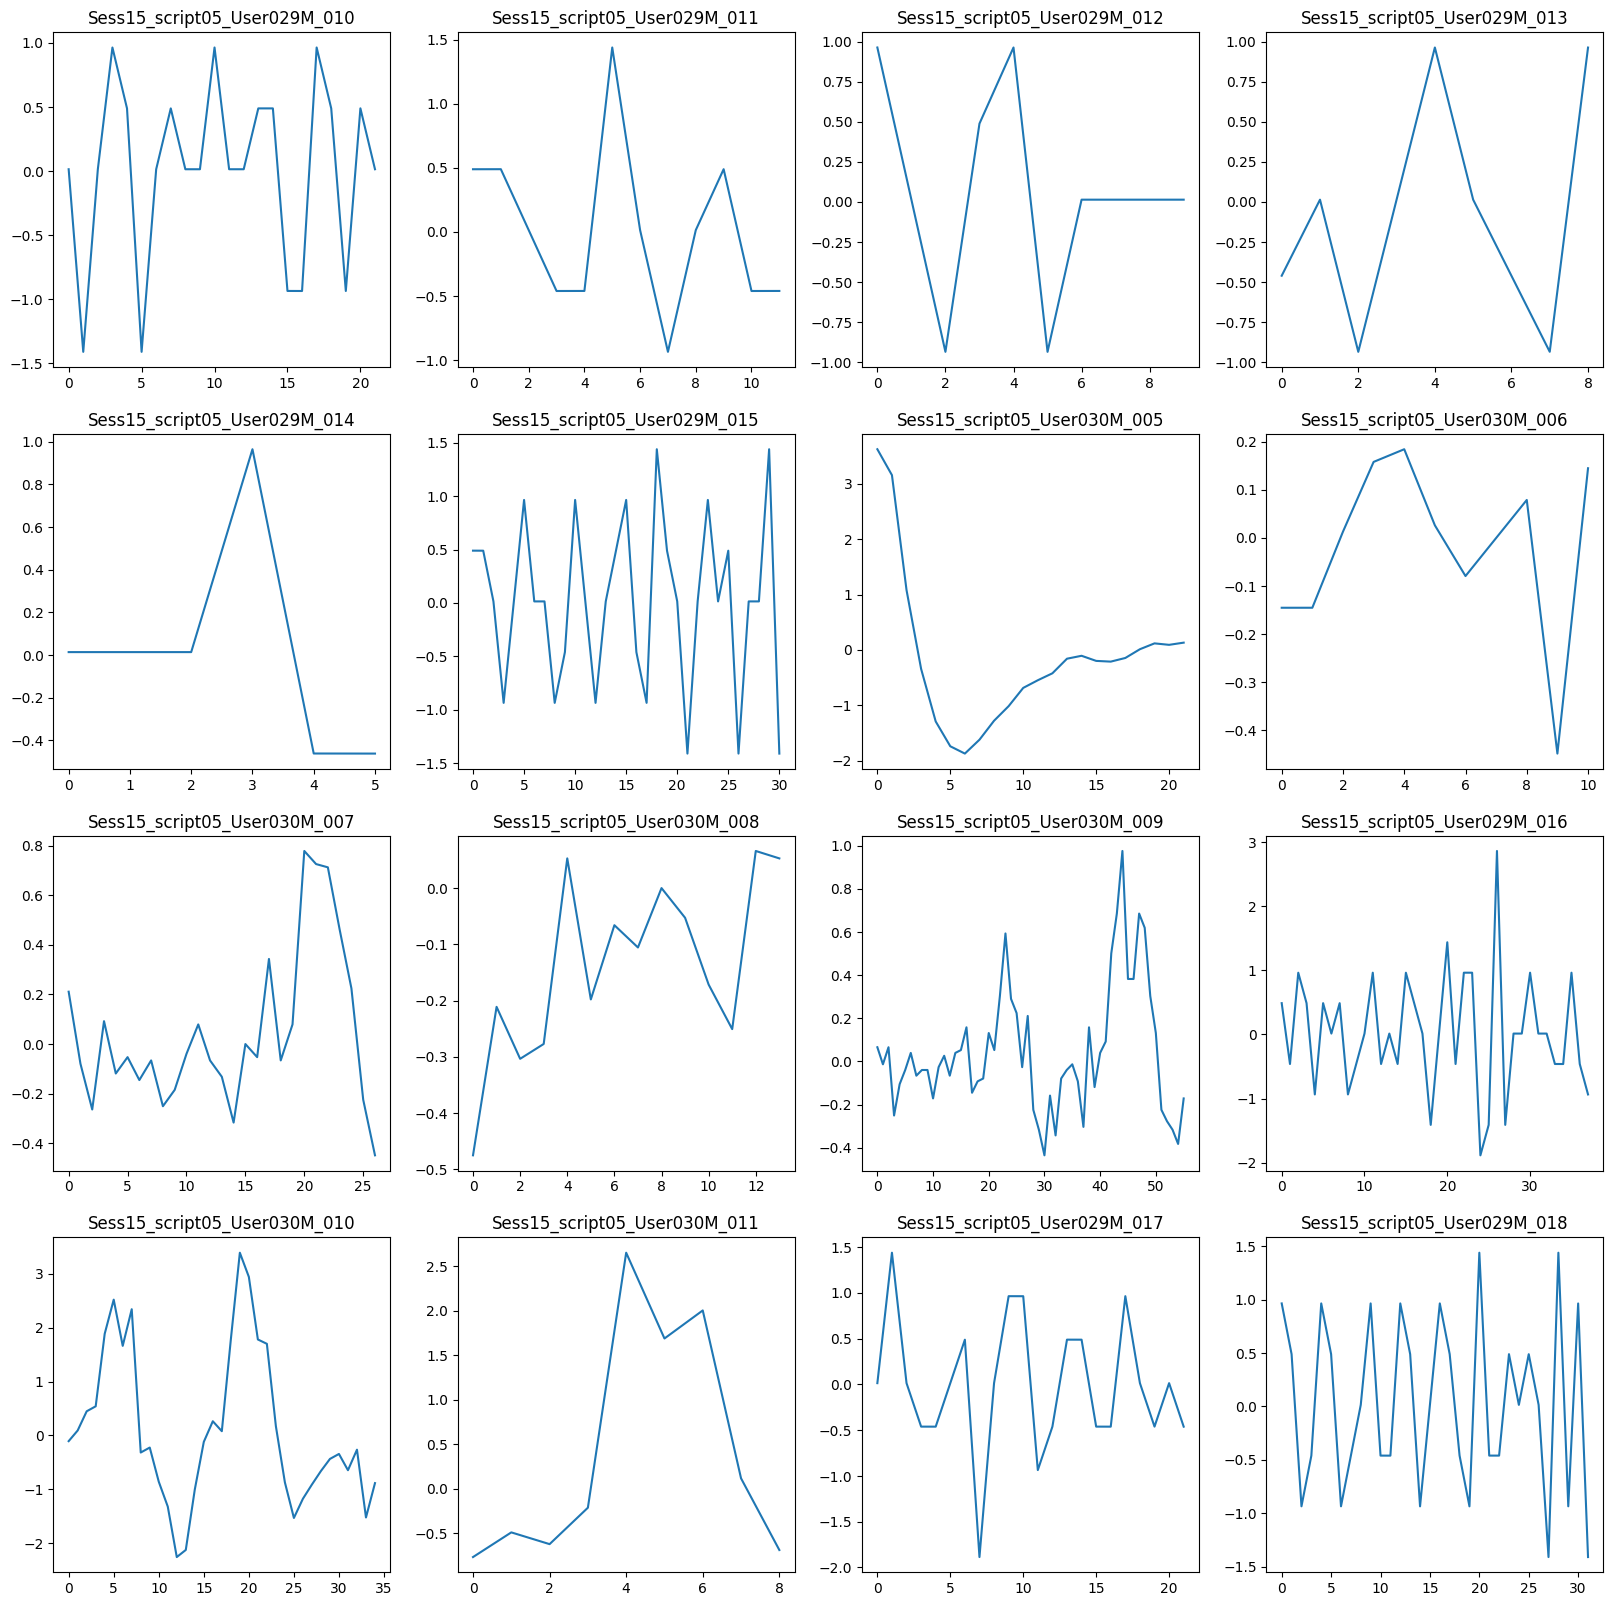

In [224]:
print("KEMDY20에서 scaled된 EDA")

import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i in range(5000,5016):
    plt.subplot(4,4,i+1-5000)
    plt.title('{}'.format(annotation_20['Segment ID'][i]))
    plt.plot(annotation_20['Scaled EDA'][i])
plt.show()

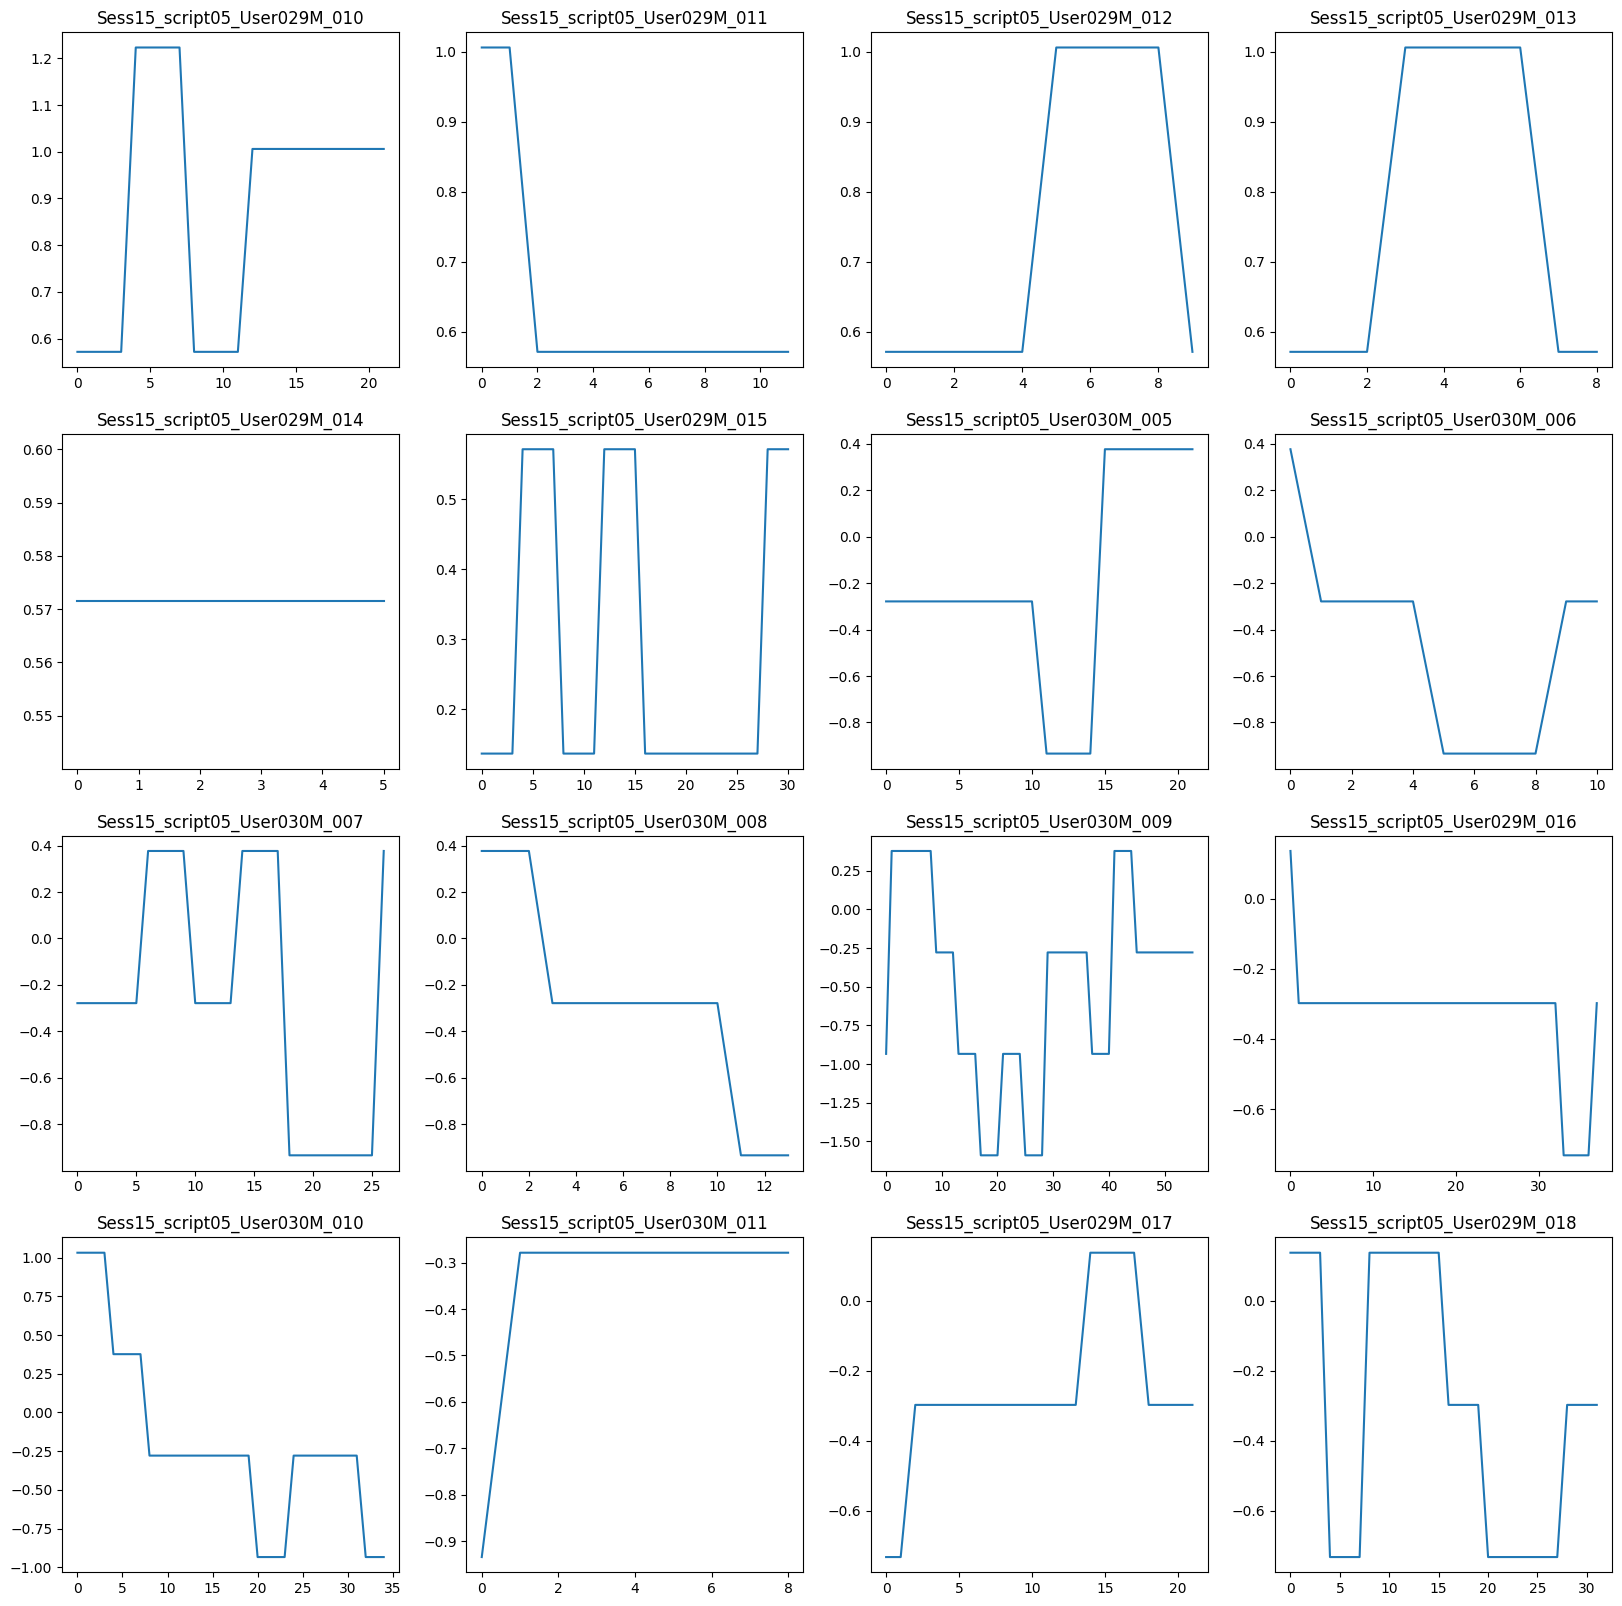

In [225]:
print("KEMDY20에서 scaled된 TEMP")

import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i in range(5000,5016):
    plt.subplot(4,4,i+1-5000)
    plt.title('{}'.format(annotation_20['Segment ID'][i]))
    plt.plot(annotation_20['Scaled TEMP'][i])
plt.show()

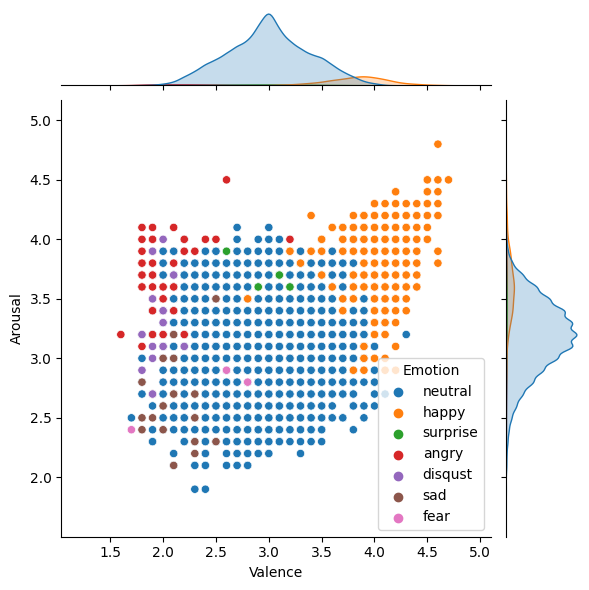

In [228]:
print("KEMDY20에서 valence와 arousal의 jointplot")
import seaborn as sns

sns.jointplot(x = 'Valence', y='Arousal', data = annotation_20.iloc[single_target_index], hue='Emotion')